In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('mymoviedb.csv',lineterminator='\n')
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [124]:
df.shape

(9827, 9)

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


In [126]:
df.isnull().sum()

Release_Date         0
Title                0
Overview             0
Popularity           0
Vote_Count           0
Vote_Average         0
Original_Language    0
Genre                0
Poster_Url           0
dtype: int64

In [127]:
print(df.duplicated().sum())

0


In [128]:
df['Genre'].head()

0    Action, Adventure, Science Fiction
1              Crime, Mystery, Thriller
2                              Thriller
3    Animation, Comedy, Family, Fantasy
4      Action, Adventure, Thriller, War
Name: Genre, dtype: object

In [129]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Popularity,9827.0,40.326088,108.873998,13.354,16.1285,21.199,35.1915,5083.954
Vote_Count,9827.0,1392.805536,2611.206907,0.000,146.0000,444.000,1376.0000,31077.000
Vote_Average,9827.0,6.439534,1.129759,0.000,5.9000,6.500,7.1000,10.000


In [130]:
df['Release_Date'] = pd.to_datetime(df['Release_Date'])

In [131]:
print(df['Release_Date'].dtype)

datetime64[ns]


In [132]:
df['Release_Date'] = df['Release_Date'].dt.year

In [133]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


### Dropping the columns

In [134]:
cols = ['Overview','Original_Language','Poster_Url']

In [135]:
df.drop(cols,axis=1,inplace=True)
df.columns

Index(['Release_Date', 'Title', 'Popularity', 'Vote_Count', 'Vote_Average',
       'Genre'],
      dtype='object')

In [136]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,6.3,Thriller
3,2021,Encanto,2402.201,5076,7.7,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,7.0,"Action, Adventure, Thriller, War"


### categorizing *****Vote_Average***** column

In [137]:
def categorize_col(df,col,labels):
    edges = [
        df[col].min(),
        df[col].quantile(0.25),
        df[col].quantile(0.50),
        df[col].quantile(0.75),
        df[col].max()
    ]
    
    df[col] = pd.cut(df[col],bins=edges ,labels= labels, duplicates= 'drop')
    return df

In [138]:
labels = ['not_popular', 'below_avg', 'average', 'popular']
categorize_col(df,'Vote_Average', labels)
df['Vote_Average'].unique()

['popular', 'below_avg', 'average', 'not_popular', NaN]
Categories (4, object): ['not_popular' < 'below_avg' < 'average' < 'popular']

In [139]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,popular,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,below_avg,Thriller
3,2021,Encanto,2402.201,5076,popular,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,average,"Action, Adventure, Thriller, War"


In [145]:
df.isnull().sum()

Release_Date      0
Title             0
Popularity        0
Vote_Count        0
Vote_Average    100
Genre             0
dtype: int64

In [144]:
print(df['Vote_Average'].isnull().sum())

100


In [141]:
df['Vote_Average'].value_counts()

Vote_Average
not_popular    2467
popular        2450
average        2412
below_avg      2398
Name: count, dtype: int64

In [147]:
df.dropna(inplace=True)

In [148]:
df.isnull().sum()

Release_Date    0
Title           0
Popularity      0
Vote_Count      0
Vote_Average    0
Genre           0
dtype: int64

In [149]:
print(df['Vote_Average'].isnull().sum())

0


In [150]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,popular,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,below_avg,Thriller
3,2021,Encanto,2402.201,5076,popular,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,average,"Action, Adventure, Thriller, War"


In [154]:
df['Genre'] = df['Genre'].str.split(', ')

In [161]:
df = df.explode('Genre').reset_index(drop=True) 
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
3,2022,The Batman,3827.658,1151,popular,Crime
4,2022,The Batman,3827.658,1151,popular,Mystery


In [162]:
df['Genre'] = df['Genre'].astype('category')
df['Genre'].dtypes

CategoricalDtype(categories=['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
                  'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
                  'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
                  'TV Movie', 'Thriller', 'War', 'Western'],
, ordered=False, categories_dtype=object)

In [166]:
df['Genre'].unique()

['Action', 'Adventure', 'Science Fiction', 'Crime', 'Mystery', ..., 'Romance', 'Western', 'History', 'TV Movie', 'Documentary']
Length: 19
Categories (19, object): ['Action', 'Adventure', 'Animation', 'Comedy', ..., 'TV Movie', 'Thriller', 'War', 'Western']

In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25552 entries, 0 to 25551
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Release_Date  25552 non-null  int32   
 1   Title         25552 non-null  object  
 2   Popularity    25552 non-null  float64 
 3   Vote_Count    25552 non-null  int64   
 4   Vote_Average  25552 non-null  category
 5   Genre         25552 non-null  category
dtypes: category(2), float64(1), int32(1), int64(1), object(1)
memory usage: 749.6+ KB


In [168]:
df.nunique()

Release_Date     100
Title           9415
Popularity      8088
Vote_Count      3265
Vote_Average       4
Genre             19
dtype: int64

# Data Visualization

In [169]:
df['Genre'].describe()

count     25552
unique       19
top       Drama
freq       3715
Name: Genre, dtype: object

In [171]:
sns.set_style('whitegrid')

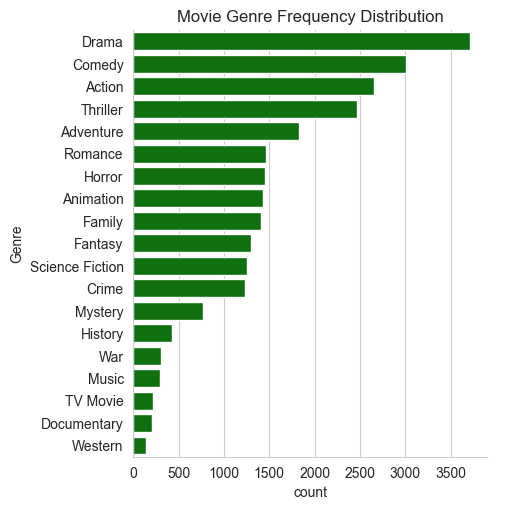

In [175]:
sns.catplot(y= 'Genre',data=df,kind ='count',order=df['Genre'].value_counts().index,color='green')
plt.title('Movie Genre Frequency Distribution')
plt.show()

In [176]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
3,2022,The Batman,3827.658,1151,popular,Crime
4,2022,The Batman,3827.658,1151,popular,Mystery


In [177]:
df['Vote_Average'].nunique()

4

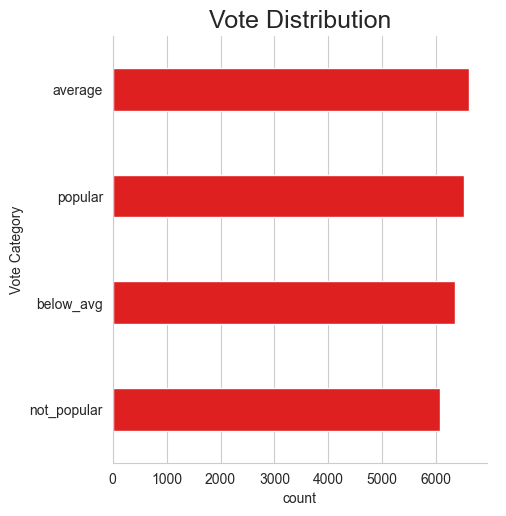

In [192]:
sns.catplot(y='Vote_Average',data= df,kind='count',width=0.4,order=df['Vote_Average'].value_counts().index,color='red')
plt.title('Vote Distribution',fontsize=18)
plt.ylabel('Vote Category')
plt.show()

In [193]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
3,2022,The Batman,3827.658,1151,popular,Crime
4,2022,The Batman,3827.658,1151,popular,Mystery


### What movie got the highest popularity? what's its genre?

In [200]:
most_popular_movie = df[df['Popularity'] == df['Popularity'].max()]
most_popular_movie

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction


### What movie got the lowest popularity? what's its genre?

In [203]:
least_popular_movie = df[df['Popularity'] == df['Popularity'].min()]
least_popular_movie

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
25546,2021,The United States vs. Billie Holiday,13.354,152,average,Music
25547,2021,The United States vs. Billie Holiday,13.354,152,average,Drama
25548,2021,The United States vs. Billie Holiday,13.354,152,average,History
25549,1984,Threads,13.354,186,popular,War
25550,1984,Threads,13.354,186,popular,Drama
25551,1984,Threads,13.354,186,popular,Science Fiction


### Which year has the most filmmed movies?


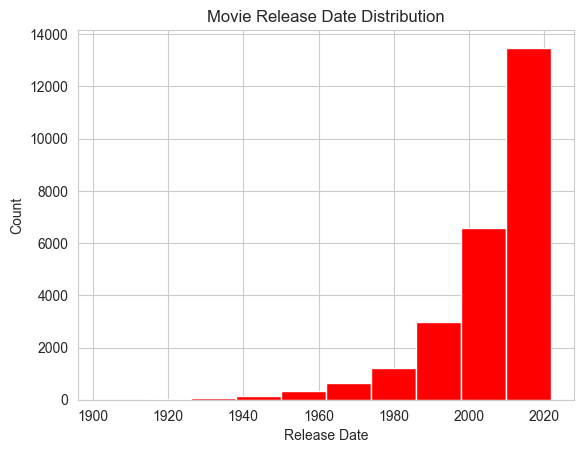

In [214]:
df['Release_Date'].hist(color='red')
plt.title('Movie Release Date Distribution')
plt.xlabel('Release Date')
plt.ylabel('Count')
plt.show()

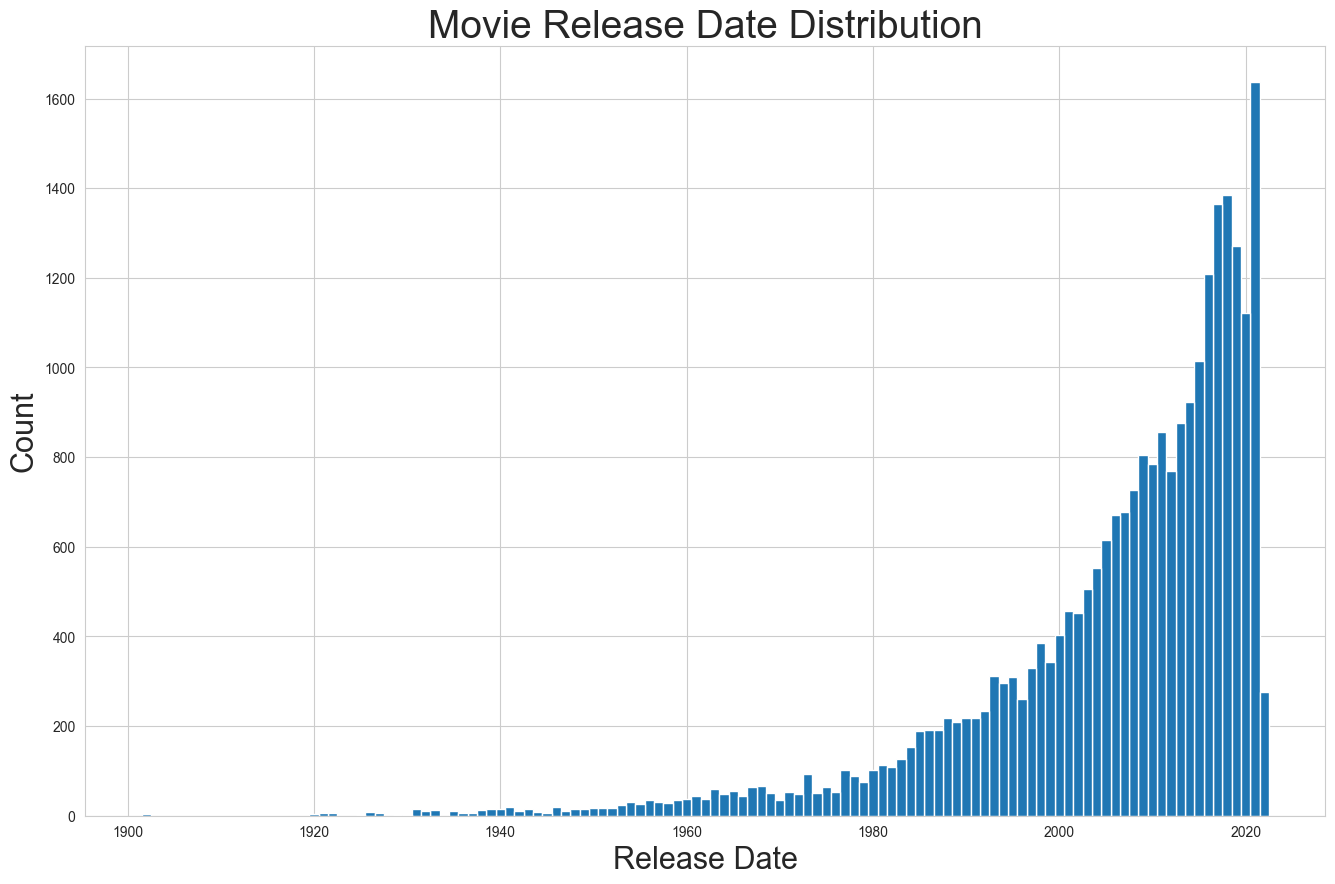

In [221]:
release_date_counts = df['Release_Date'].value_counts()
plt.figure(figsize=(16,10))
plt.bar(release_date_counts.index,release_date_counts.values,width=1)
plt.title('Movie Release Date Distribution',fontsize=28)
plt.xlabel('Release Date',fontsize=22)
plt.ylabel('Count',fontsize=22)
plt.show()


### Key Findings:

- **Dominance of Drama Genre**: The **Drama** genre is the most prevalent in the dataset, representing over 14% of all movies across 19 genres.

- **Popularity Distribution**: 25.5% of the movies have a high popularity score (6520 rows), with the Drama genre again leading, accounting for more than 18.5% of these popular films.

- **Highest Popularity Movie**: *Spider-Man: No Way Home* holds the highest popularity score in the dataset, with genres spanning **Action**, **Adventure**, and **Science Fiction**.

- **Least Popular Movies**: *The United States vs. Billie Holiday* and *Threads* exhibit the lowest popularity scores, belonging to the **Music**, **Drama**, and **History** genres, and **War**, **Drama**, and **Science Fiction** genres, respectively.

- **Trends in Movie Releases (2020)**: The year 2020 saw the highest number of movies being released in the dataset.
